In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random

from sklearn.datasets import load_diabetes
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

from featdist import (
    numerical_ttt_dist,
    categorical_ttt_dist,
    )

sns.set()
warnings.simplefilter("ignore")

# Data Preparations

In [2]:
SEED = 10
random.seed(SEED)
np.random.seed(SEED)
diabetes_data = load_diabetes()
df_diabetes = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)
df_diabetes['sex'] = df_diabetes['sex'].astype(str)
df_diabetes['sex'].replace({'0.0506801187398187':'M', '-0.044641636506989':'F'}, inplace=True)
df_diabetes['random_cat_col'] = np.random.choice(['A', 'B', 'C'], size=len(df_diabetes), p=[0.9, 0.05, 0.05])
df_diabetes['target_reg'] = diabetes_data['target']
df_diabetes['target_clf'] = pd.cut(diabetes_data['target'], 4)
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,random_cat_col,target_reg,target_clf
0,0.038076,0.05068011873981862,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,A,151.0,"(105.25, 185.5]"
1,-0.001882,-0.044641636506989144,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,A,75.0,"(24.679, 105.25]"
2,0.085299,0.05068011873981862,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,A,141.0,"(105.25, 185.5]"
3,-0.089063,-0.044641636506989144,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,A,206.0,"(185.5, 265.75]"
4,0.005383,-0.044641636506989144,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,A,135.0,"(105.25, 185.5]"


In [3]:
cat_features = list(df_diabetes.select_dtypes('object').columns)
num_features = list(df_diabetes.select_dtypes('float').columns)
num_features.remove("target_reg")
features = num_features + cat_features
print("cat_features:", cat_features)
print("num_features:", num_features)

cat_features: ['sex', 'random_cat_col']
num_features: ['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_diabetes[cat_features+num_features], df_diabetes['target_reg'], test_size=0.5, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
X_train['target_reg'], X_test['target_reg'], X_val['target_reg'] = y_train, y_test, y_val

## Numeric Features

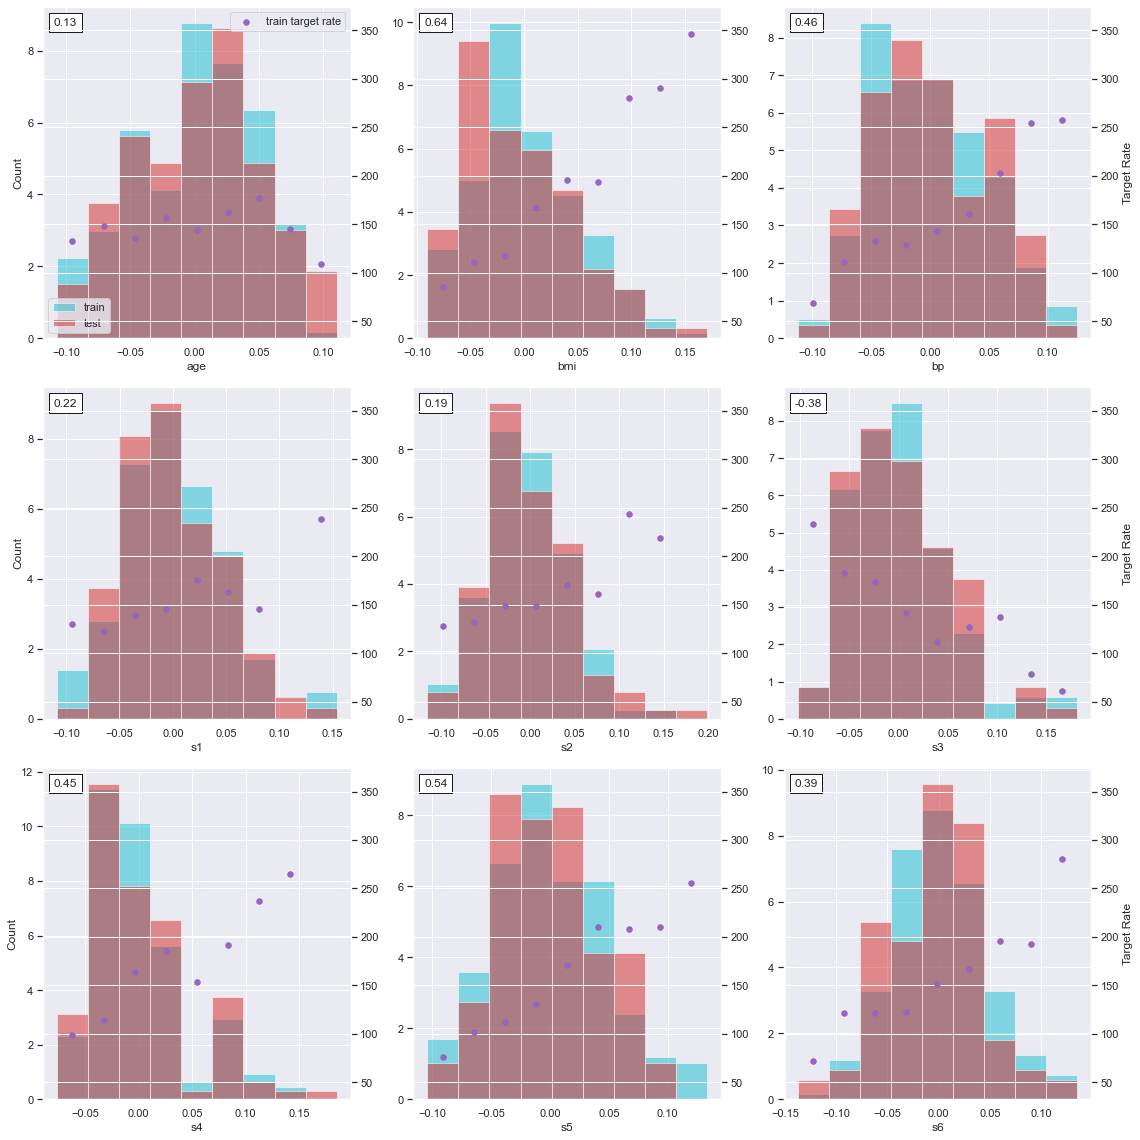

,feature,train_trend_changes,test_trend_changes,train_test_trend_corr,train_target_trend_changes
4,s2,1,1,0.982867,3
3,s1,2,1,0.974613,2
6,s4,3,3,0.973612,3
5,s3,3,3,0.971118,2
0,age,3,3,0.929305,5
2,bp,1,3,0.912784,2
8,s6,1,3,0.901119,2
7,s5,1,3,0.895052,2
1,bmi,1,1,0.788175,2


In [5]:
df_stats = numerical_ttt_dist(train=X_train, test=X_test, features=num_features, target='target_reg')
df_stats

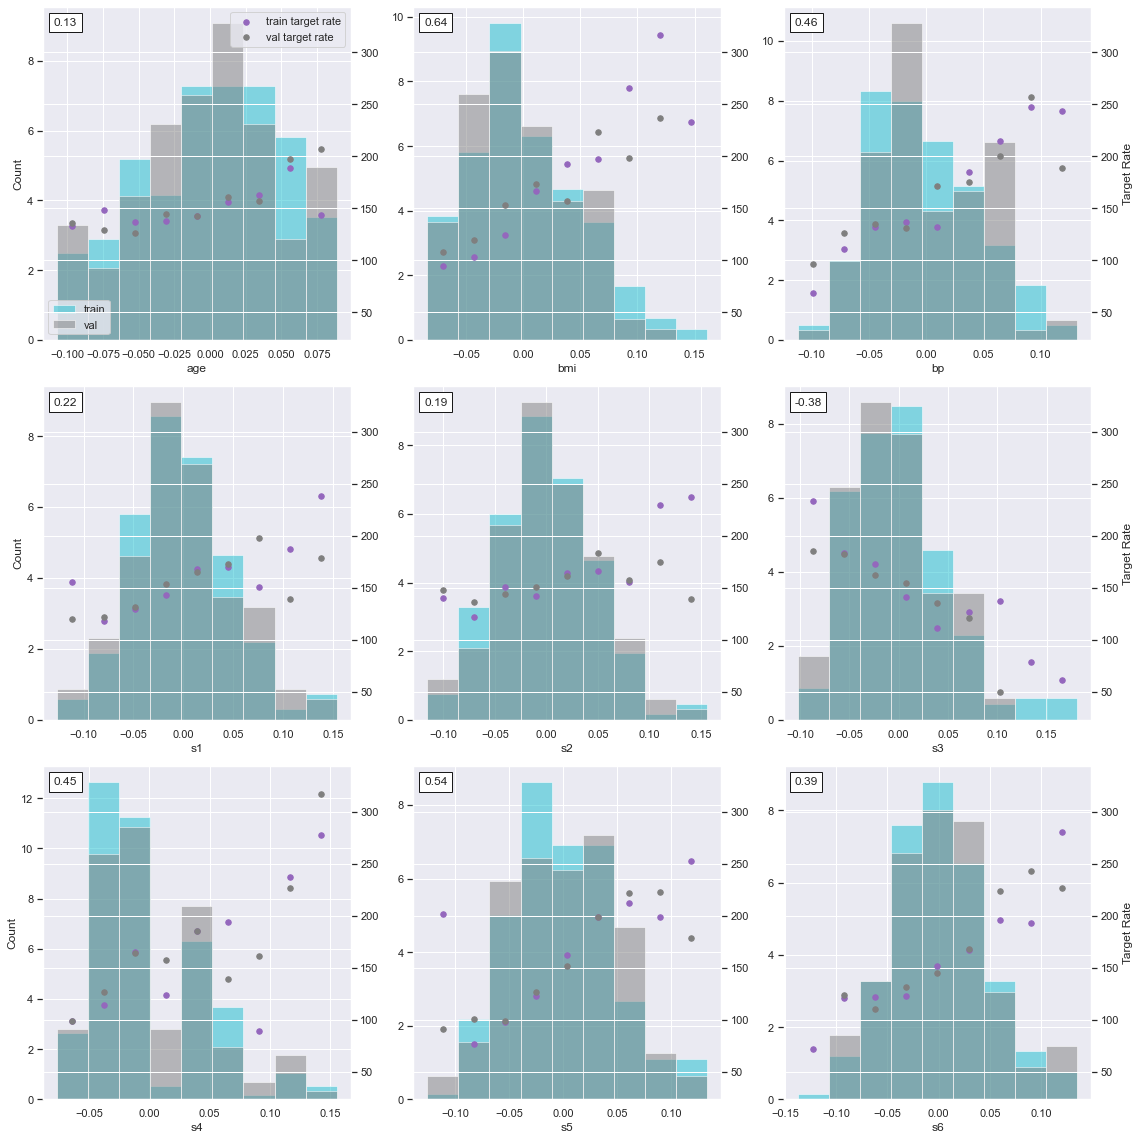

,feature,train_trend_changes,val_trend_changes,train_val_trend_corr,train_target_trend_changes,val_target_trend_changes,train_val_target_trend_corr
4,s2,2,1,0.985061,5,4,0.271551
8,s6,1,2,0.974868,2,2,0.869735
3,s1,2,1,0.971531,3,2,0.468250
5,s3,3,1,0.970460,2,0,0.841383
1,bmi,1,3,0.962810,1,5,0.340925
6,s4,5,5,0.954320,4,4,0.844369
7,s5,1,3,0.931586,3,3,0.663718
2,bp,1,3,0.830844,3,3,0.909893
0,age,3,3,0.689442,3,5,0.583150


In [6]:
df_stats = numerical_ttt_dist(train=X_train, val=X_val, features=num_features, target='target_reg')
df_stats

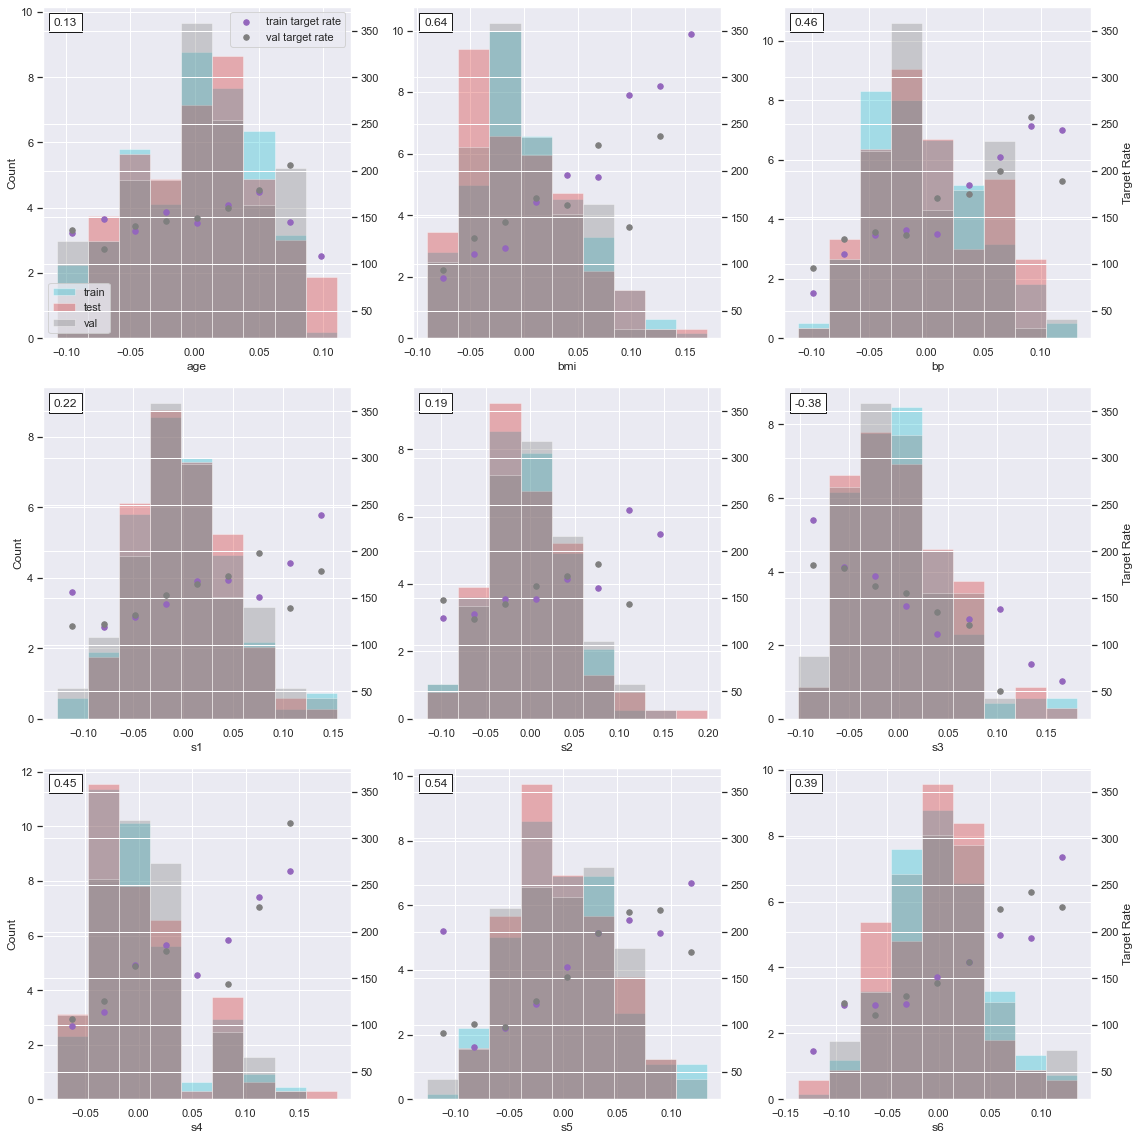

,feature,train_trend_changes,test_trend_changes,val_trend_changes,train_test_trend_corr,train_val_trend_corr,val_test_trend_corr,train_target_trend_changes,val_target_trend_changes,train_val_target_trend_corr
3,s1,2,1,1,0.995101,0.971531,0.956256,3,2,0.468250
4,s2,1,1,1,0.982867,0.984036,0.952189,3,2,0.336733
6,s4,3,3,3,0.973612,0.922515,0.905096,3,3,0.823209
7,s5,1,1,3,0.971401,0.931586,0.923155,3,3,0.663718
5,s3,3,3,1,0.971118,0.970460,0.972958,2,0,0.841383
0,age,3,3,6,0.929305,0.891025,0.811148,5,2,0.755651
8,s6,1,3,2,0.901119,0.974868,0.922127,2,2,0.869735
2,bp,1,3,3,0.892519,0.830844,0.895930,3,3,0.909893
1,bmi,1,1,3,0.788175,0.978135,0.823203,2,5,-0.141147


In [7]:
df_stats = numerical_ttt_dist(train=X_train, test=X_test, val=X_val, features=num_features, target='target_reg')
df_stats

# Categorical Features

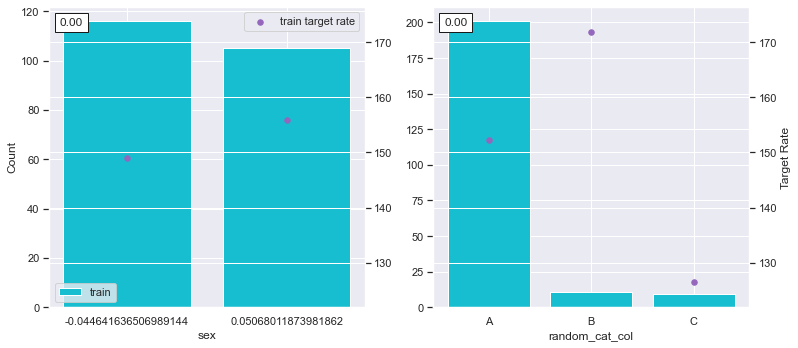

,feature,train_nunique
0,sex,2
1,random_cat_col,3


In [9]:
df_stats = categorical_ttt_dist(train=X_train, features=cat_features, target='target_reg')
df_stats

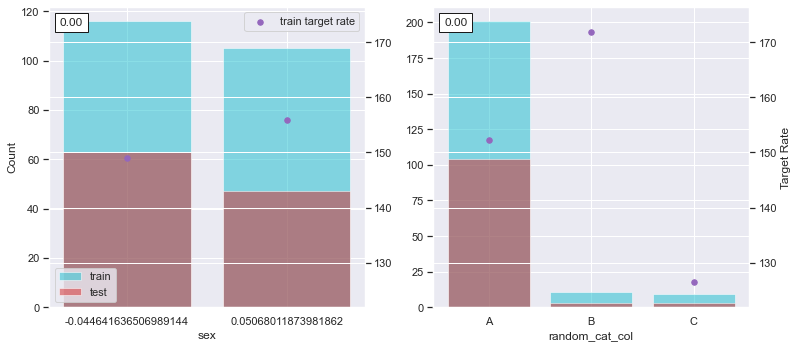

,feature,train_nunique,test_nunique,train_test_rmse,train_test_same_unique
1,random_cat_col,3,3,9.833380,True
0,sex,2,2,14.952094,True


In [10]:
df_stats = categorical_ttt_dist(train=X_train, test=X_test, features=cat_features, target='target_reg')
df_stats

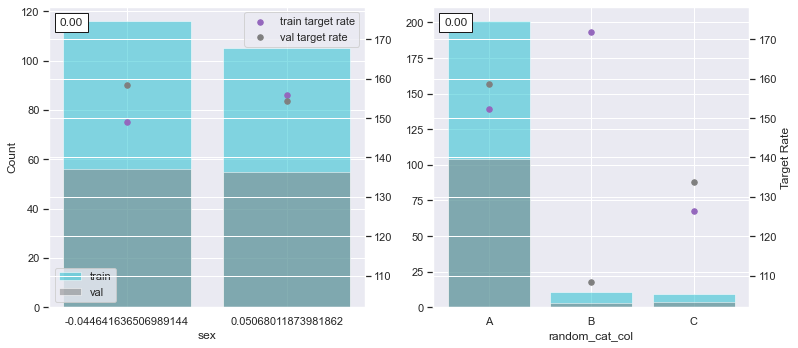

,feature,train_nunique,val_nunique,train_val_rmse,train_val_target_rmse,train_val_same_unique
0,sex,2,2,6.370331,9.596212,True
1,random_cat_col,3,3,7.943872,64.303676,True


In [11]:
df_stats = categorical_ttt_dist(train=X_train, val=X_val, features=cat_features, target='target_reg')
df_stats

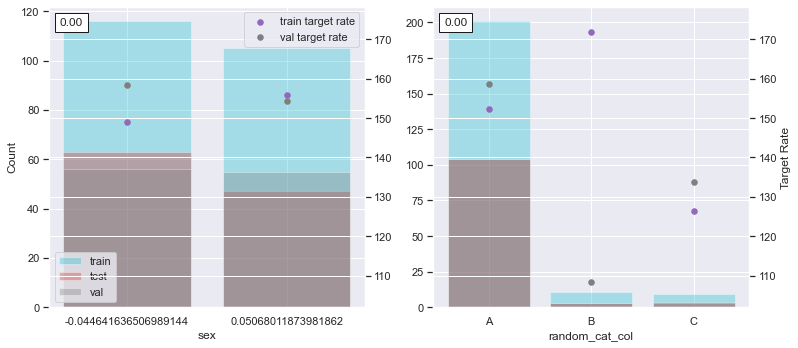

,feature,train_nunique,test_nunique,val_nunique,train_test_rmse,train_val_rmse,val_test_rmse,train_val_target_rmse,train_test_same_unique,train_val_same_unique,val_test_same_unique
0,sex,2,2,2,14.952094,6.370331,21.322426,9.596212,True,True,True
1,random_cat_col,3,3,3,9.833380,7.943872,2.701318,64.303676,True,True,True


In [12]:
df_stats = categorical_ttt_dist(train=X_train, test=X_test, val=X_val, features=cat_features, target='target_reg')
df_stats